**This is EDA to see how the nutrients in various food items vary along with other information,so that we can categorize whether it is a healthy food**

In [19]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


df = pd.read_csv('en.openfoodfacts.org.products.tsv', delimiter='\t', encoding='utf-8')
df_specs = df[df.energy_100g.notnull() & df.carbohydrates_100g.notnull() & df.fat_100g.notnull() & df.proteins_100g.notnull() & df.main_category_en.notnull() & df['nutrition-score-uk_100g']]

df_specs = df_specs[['code','generic_name','energy_100g','carbohydrates_100g','fat_100g','proteins_100g', 'main_category_en', 'nutrition-score-uk_100g']]


df_count = df_specs.groupby('main_category_en').filter(lambda x:len(x)>60)

list = ['Sugary snacks', 'Dairies', 'Meats', 'Beverages', 'Salty snacks', 'Fruit juices', 'Canned foods', 'Desserts', 'Seafood', 'Spreads', 'Sweeteners', 'es:Pan-y-reposteria']
print (df_count[df_count['main_category_en' != list]])


/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (17,18,24,25,26,28,37,38,39,48) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


KeyError: ignored

## The below plot shows correlation between energy and carbohydrates/100g,fat/100g,protein/100g of the food present in the data set.
## Based on this,we can recommend food with more protein and less fats.

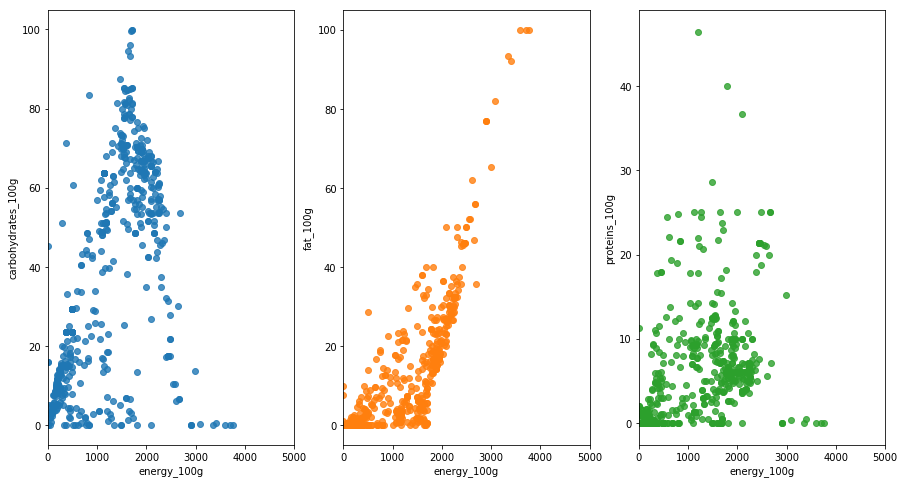

In [20]:
fig,(ax1,ax2,ax3) = plt.subplots(1,3,figsize = [15,8], sharex = True)
plt.xlim((0,5000))
plot_carbs = sns.regplot(x = "energy_100g", y = "carbohydrates_100g", fit_reg = False, ax = ax1, data = df_specs)
plot_fat = sns.regplot(x = "energy_100g", y = "fat_100g", ax = ax2, fit_reg = False, data = df_specs)
plot_protein = sns.regplot(x = "energy_100g", y = "proteins_100g", fit_reg = False, ax = ax3, data = df_specs)

**This is representation of how the carbohydrate information varies with energy.So people looking for "energy providing" foods,this can be a helpful insight as to what will provide the most energy.**

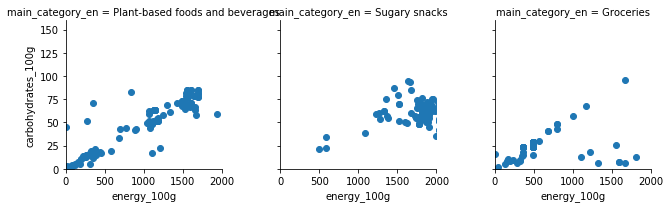

In [21]:
carbs_val = sns.FacetGrid(df_count, col = "main_category_en", col_wrap = 5, ylim = (0,160), xlim = (0,2000))
carbs_val = carbs_val.map(plt.scatter,"energy_100g", "carbohydrates_100g")

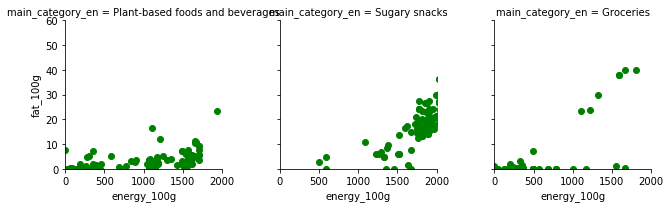

In [22]:
fats_val = sns.FacetGrid(df_count, col = "main_category_en", col_wrap = 5, ylim = (0,60), xlim = (0,2000))
fats_val = fats_val.map(plt.scatter, "energy_100g", "fat_100g", color = "green")

**This is the mean calorie value in the main categoryof food items.The obvious insight is the "Sugary Snacks" category,having the most calorie count.**

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


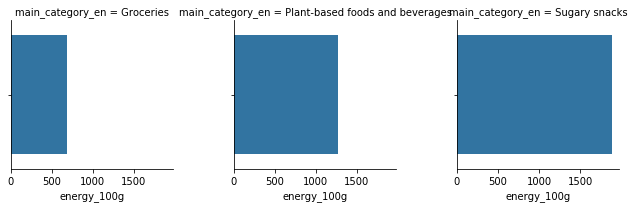

In [23]:
nutrient_mean = df_count.groupby('main_category_en', as_index = False).mean()


mean_cal_val = sns.FacetGrid(nutrient_mean,col = "main_category_en", col_wrap = 5)
mean_cal_val =mean_cal_val.map(sns.barplot, "energy_100g")